This notebook downloads a **literally** very long source image comprising of all natural scence stimuli, and then breaks them into stimuli specific images, please check whether they match with Allen before using

In [ ]:
# uncomment this out to install packages if they are missing
# %pip install numpy pandas scikit-image matplotlib

In [1]:
%%bash
IMAGE_LINK="https://observatory.brain-map.org/visualcoding/assets/spritesheets/nat_image_300x235-984c7c7ac544351aaceb6f8442ef118e0c51c7f8bf8b4cd9ac02ebb6e99d3ee9.jpg"
wget -O natural-scene-full.jpg "$IMAGE_LINK"

--2023-11-24 16:12:16--  https://observatory.brain-map.org/visualcoding/assets/spritesheets/nat_image_300x235-984c7c7ac544351aaceb6f8442ef118e0c51c7f8bf8b4cd9ac02ebb6e99d3ee9.jpg
Resolving observatory.brain-map.org (observatory.brain-map.org)... 163.123.189.93
Connecting to observatory.brain-map.org (observatory.brain-map.org)|163.123.189.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 938372 (916K) [image/jpeg]
Saving to: ‘natural-scene-full.jpg’

     0K .......... .......... .......... .......... ..........  5%  360K 2s
    50K .......... .......... .......... .......... .......... 10%  653K 2s
   100K .......... .......... .......... .......... .......... 16% 1.29M 1s
   150K .......... .......... .......... .......... .......... 21% 1.44M 1s
   200K .......... .......... .......... .......... .......... 27%  729K 1s
   250K .......... .......... .......... .......... .......... 32% 35.1M 1s
   300K .......... .......... .......... .......... ..........

In [2]:
import numpy as np
import pandas as pd
from skimage.io import imread, imsave
from matplotlib import pyplot as plt 

In [3]:
source_imag_path = 'natural-scene-full.jpg'

full_image = imread(source_imag_path, as_gray=True)

In [4]:
full_image.shape

(235, 35400)

In [5]:
num_images = 118 # expected
width = 300 # expected

assert full_image.shape[1] / width == num_images

In [6]:
assert full_image.min() >= 0 and full_image.max() <= 1
full_image = (full_image * 255).astype('uint8')
images = np.split(full_image, num_images, axis=1)

In [11]:
start_index = 1

for idx in range(num_images):
    imsave(
        f'images/image_{idx + start_index:03d}.png', 
        images[idx]
    )

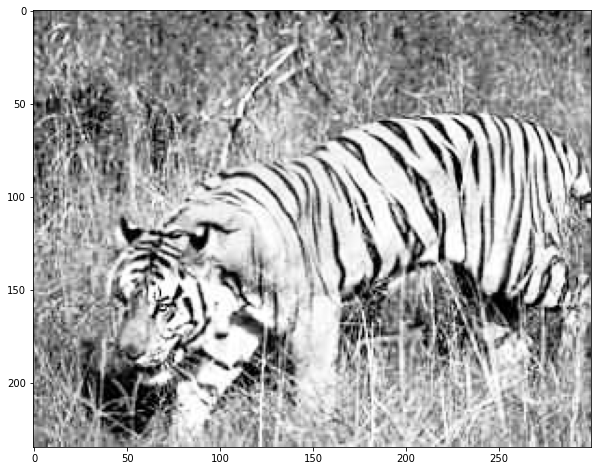

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(images[10], cmap='Greys_r')